## Exploratory Data Analysis (EDA) and Data Cleaning 

### Importing libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys
import polars as pl
import random

In [4]:
print(os.getcwd())

c:\Users\ntama\Documentos\Data Science\My Projects\breast-cancer-gene-test\notebooks


### Importing datasets

In [5]:
clinic_data = pd.read_csv("../processed/clinic_data.csv")
clinic_data.head()

,SampleID,scan-b external id,instrument model,age at diagnosis,tumor size,lymph node group,lymph node status,er status,pgr status,her2 status,...,nhg prediction mgc,er prediction sgc,pgr prediction sgc,her2 prediction sgc,ki67 prediction sgc,pam50 subtype,overall survival days,overall survival event,endocrine treated,chemo treated
0,F1,Q008818.C008840.S000215.l.r.m2.c.lib.g.k.a.t,HiSeq 2000,43,9.0,NodeNegative,NodeNegative,NaN,NaN,0.0,...,G3,0,0,0,1,Basal,2367,0,0.0,1.0
1,F2,Q008769.C008792.S000250.l.r.m.c.lib.g.k.a.t,HiSeq 2000,48,14.0,1to3,NodePositive,1.0,1.0,0.0,...,G2,1,1,0,0,LumA,2367,0,1.0,1.0
2,F3,Q008568.C008577.S000424.l.r.m3.c.lib.g.k.a.t,HiSeq 2000,69,27.0,4toX,NodePositive,1.0,1.0,0.0,...,G3,1,1,0,1,LumB,2168,1,1.0,1.0
3,F4,Q008909.C009000.S000084.l.r.m.c.lib.g.k.a.t,HiSeq 2000,39,51.0,1to3,NodePositive,1.0,NaN,1.0,...,G3,1,1,1,1,LumA,2416,0,1.0,1.0
4,F5,Q008781.C008782.S000260.l.r.m.c.lib.g.k.a.t,HiSeq 2000,73,60.0,4toX,NodePositive,1.0,NaN,0.0,...,G2,1,1,0,0,Normal,2389,0,1.0,0.0


In [6]:
gene_nhg = pd.read_csv("../processed/gene_nhg.csv")
gene_nhg.head()

,SampleID,5_8S_rRNA,5S_rRNA,6M1-18,7M1-2,7SK,A1BG,A1BG-AS1,A1CF,A2M,...,ZWINT,ZXDA,ZXDB,ZXDC,ZYG11A,ZYG11B,ZYX,ZZEF1,ZZZ3,nhg prediction mgc
0,F1,-3.321928,4.911099,-3.321928,-3.321928,-0.539253,0.598115,-1.352525,-3.213583,6.172477,...,3.044573,1.640598,2.425306,3.244432,-0.411950,1.468899,6.281767,1.774107,2.437227,G3
1,F2,-3.321928,-3.321928,-3.321928,-3.321928,-0.576620,2.363673,-0.779430,-3.054421,7.113514,...,2.743902,0.684370,1.861781,2.727427,-0.452902,1.924761,7.169613,1.764214,2.876100,G2
2,F3,-3.321928,-3.321928,-3.321928,-3.321928,-1.651323,2.647738,0.085410,-3.321928,5.641996,...,4.719843,-0.160076,1.365396,3.122333,0.594147,1.619277,6.683400,2.039246,2.929346,G3
3,F4,-3.321928,3.656393,-3.321928,-3.321928,0.126633,1.378576,-0.334324,-3.321928,7.236769,...,4.157466,1.036271,2.038984,3.182823,-0.046619,1.969433,6.666306,2.771650,2.777674,G3
4,F5,-3.321928,4.190104,-3.321928,-3.321928,0.783715,2.759643,0.984849,-3.321928,7.508171,...,1.024820,1.147535,2.032704,3.588842,0.808823,2.998474,6.479006,2.696269,3.957146,G2


In [7]:
gene_pam50 = pd.read_csv("../processed/gene_pam50.csv")
gene_pam50.head()

,SampleID,5_8S_rRNA,5S_rRNA,6M1-18,7M1-2,7SK,A1BG,A1BG-AS1,A1CF,A2M,...,ZWINT,ZXDA,ZXDB,ZXDC,ZYG11A,ZYG11B,ZYX,ZZEF1,ZZZ3,pam50 subtype
0,F1,-3.321928,4.911099,-3.321928,-3.321928,-0.539253,0.598115,-1.352525,-3.213583,6.172477,...,3.044573,1.640598,2.425306,3.244432,-0.411950,1.468899,6.281767,1.774107,2.437227,Basal
1,F2,-3.321928,-3.321928,-3.321928,-3.321928,-0.576620,2.363673,-0.779430,-3.054421,7.113514,...,2.743902,0.684370,1.861781,2.727427,-0.452902,1.924761,7.169613,1.764214,2.876100,LumA
2,F3,-3.321928,-3.321928,-3.321928,-3.321928,-1.651323,2.647738,0.085410,-3.321928,5.641996,...,4.719843,-0.160076,1.365396,3.122333,0.594147,1.619277,6.683400,2.039246,2.929346,LumB
3,F4,-3.321928,3.656393,-3.321928,-3.321928,0.126633,1.378576,-0.334324,-3.321928,7.236769,...,4.157466,1.036271,2.038984,3.182823,-0.046619,1.969433,6.666306,2.771650,2.777674,LumA
4,F5,-3.321928,4.190104,-3.321928,-3.321928,0.783715,2.759643,0.984849,-3.321928,7.508171,...,1.024820,1.147535,2.032704,3.588842,0.808823,2.998474,6.479006,2.696269,3.957146,Normal


### Working with "gene_pam50" - Molecular classification for five subtypes (`LumA`, `LumB`, `HER2`, `Basal`, `Normal`)

As a first approach, let's focus on the prediction of these five subtypes

In [8]:
print(gene_pam50.shape)

(3409, 30867)


In [9]:
gene_pam50.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3409 entries, 0 to 3408
Columns: 30867 entries, SampleID to pam50 subtype
dtypes: float64(30865), object(2)
memory usage: 802.8+ MB


#### Visualization of boxplots for some random samples

In [10]:
#converting some random rows into series
#trying with 20 random rows
random_samples_series = []
for i in np.random.randint(0, len(gene_pam50), 20):
    series_name = f'series_sample_F{i+1}'
    random_samples_bxp = gene_pam50.iloc[i]
    random_samples_bxp.name = series_name
    random_samples_series.append(random_samples_bxp)


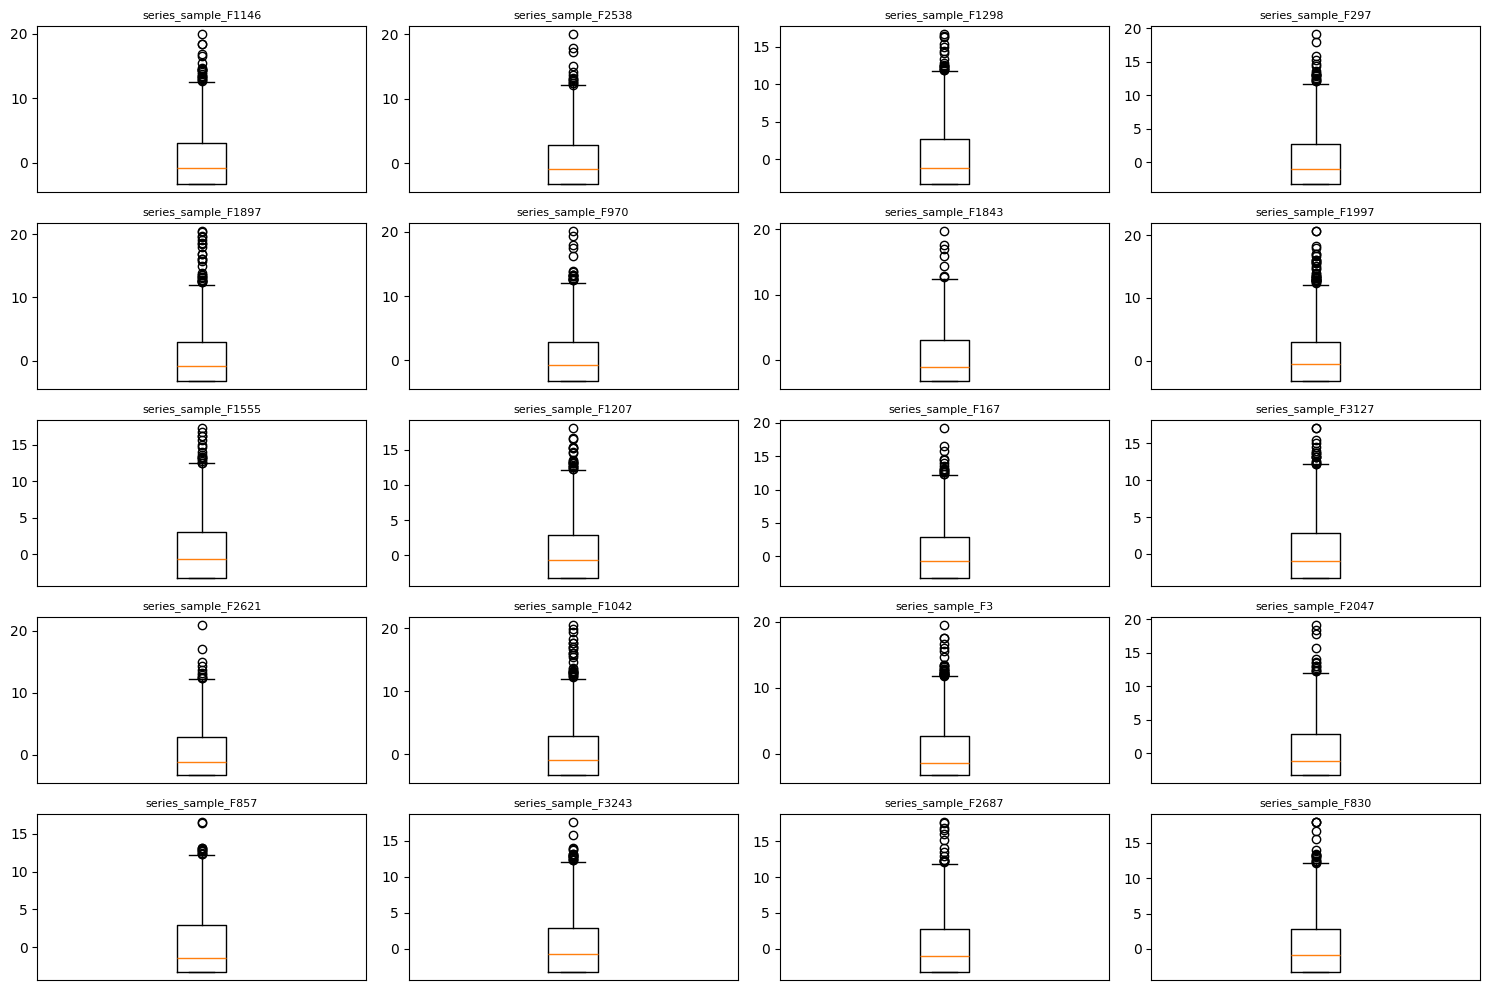

In [11]:
class Plotter1():
    def __init__(self, df):
        self.df = df

    def boxplotter(self):
        n = len(self.df)

        rows = int(np.ceil(np.sqrt(n)))
        cols = int(np.ceil(n / rows))

        fig, axes = plt.subplots(rows, cols, figsize=(15, 10))
        axes = axes.flatten()

        for idx, series in enumerate(self.df):
            numeric_values = pd.to_numeric(series, errors="coerce").dropna()
            
            if len(numeric_values) > 0:  # evitar series vacías
                axes[idx].boxplot(numeric_values.values)
                axes[idx].set_title(series.name, fontsize=8)
                axes[idx].tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
            else:
                axes[idx].text(0.5, 0.5, "No numeric data", ha='center', va='center')
                axes[idx].set_title(series.name, fontsize=8)
                axes[idx].axis("off")

        for j in range(idx + 1, len(axes)):
            fig.delaxes(axes[j])

        plt.tight_layout()
        plt.show()

plotter1 = Plotter1(random_samples_series)
plotter1.boxplotter()

`Observations`
- Each boxplot is a sample FXXX. The range of values is represented within the main box.
- Median is close to zero in most cases
- Values range from -3 to 20 in most cases
- Large amount of low values, which means genes minimally expressed
- Long tail up (highly expressed genes)
- Judging by the scale, these values are already normalized with log2(TPM + 1) </br>
-- These are the common values for RNA-seq:
    - Raw counts: number of readings assinged to a specific gen. (ranges 0 - X0.000)-int

    - FPKM (Fragments Per Kilobase Million)

    - TPM (Transcripts Per Million): 0 - Thousands

    - log2(TPM + 1): common scale to stabilize variance

### Visualization of histograms for same random samples

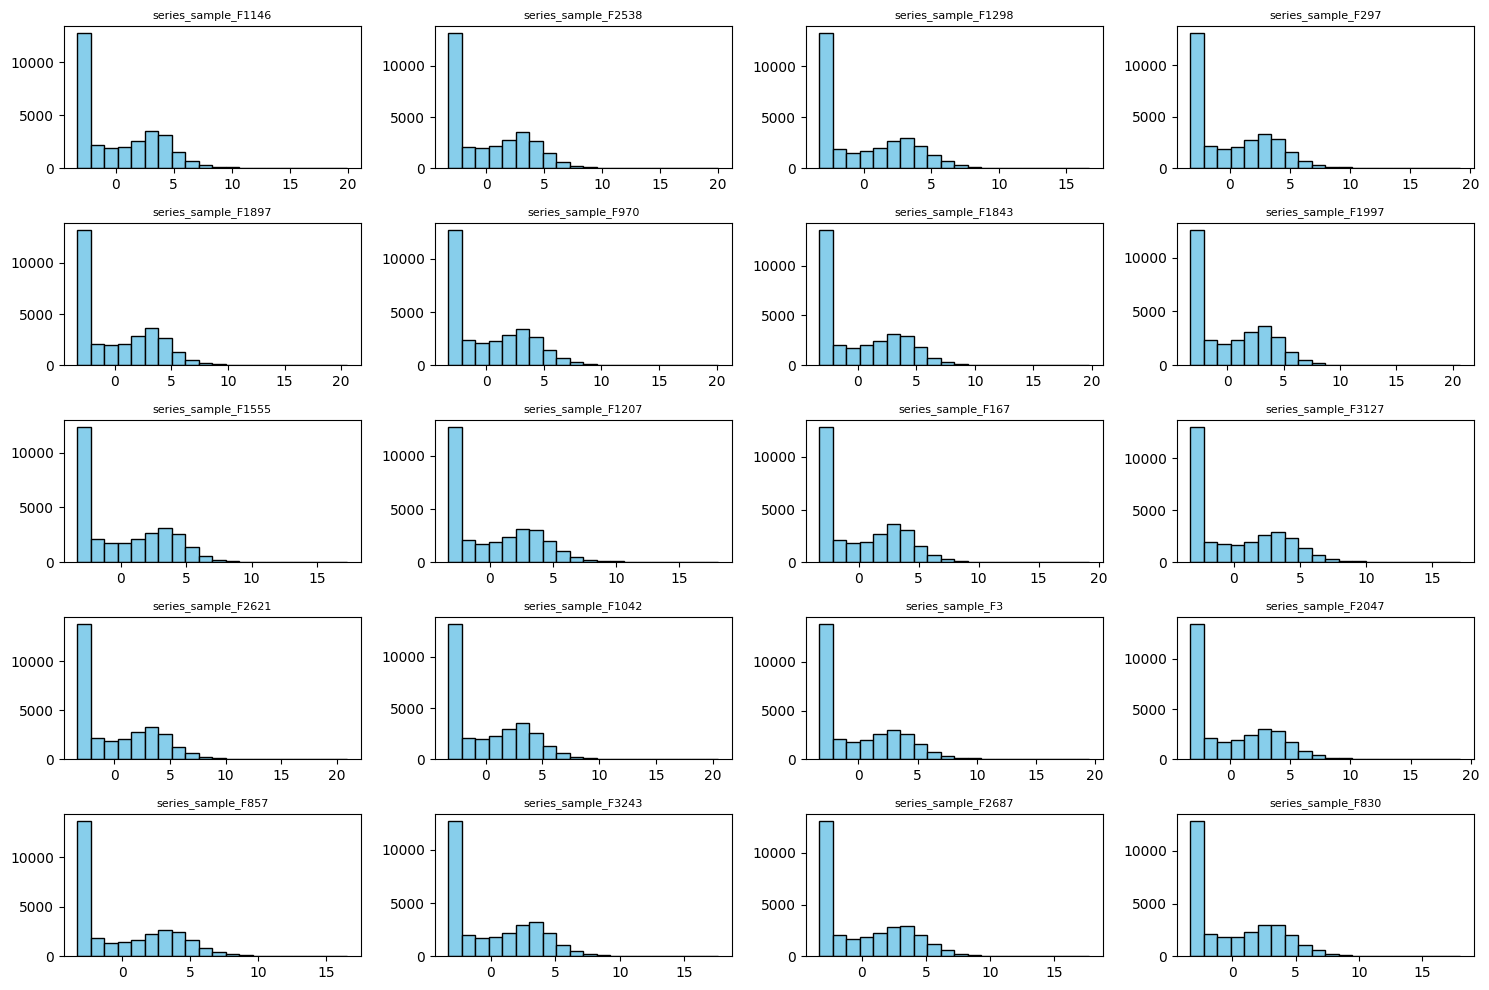

In [12]:
class Plotter2():
    def __init__(self, df):
        self.df = df

    def histplotter(self):
        n = len(self.df)

        # calcular layout (cuadrado aproximado)
        rows = int(np.ceil(np.sqrt(n)))
        cols = int(np.ceil(n / rows))

        fig, axes = plt.subplots(rows, cols, figsize=(15, 10))
        axes = axes.flatten()

        for idx, series in enumerate(self.df):
            numeric_values = pd.to_numeric(series, errors="coerce").dropna()
            
            if len(numeric_values) > 0:
                axes[idx].hist(numeric_values.values, bins=20, color="skyblue", edgecolor="black")
                axes[idx].set_title(series.name, fontsize=8)
            else:
                axes[idx].text(0.5, 0.5, "No numeric data", ha='center', va='center')
                axes[idx].set_title(series.name, fontsize=8)
                axes[idx].axis("off")

        # eliminar subplots sobrantes
        for j in range(idx + 1, len(axes)):
            fig.delaxes(axes[j])

        plt.tight_layout()
        plt.show()

plotter2 = Plotter2(random_samples_series)
plotter2.histplotter()

### Finding the number of expressed genes per sample

Since the gene values are log2(TPM + 1) transformed, it is necessary to define a threshold to determine the level of gene expression. </br>
As an initial criterion, ``log2(TPM + 1) > 1`` will be used, therefore a value that is higher than 1 will be considered as a highly expressed gene.

How will this provide information for EDA?</br>
- Similar ranges of expressed genes are expected for biological groups or subtypes.
- Correlation between number of expressed genes among groups and tumoral spread rate.

In [13]:
num_cols = list(gene_pam50.columns[1: (len(gene_pam50.columns)-1)])
print(num_cols)

['5_8S_rRNA', '5S_rRNA', '6M1-18', '7M1-2', '7SK', 'A1BG', 'A1BG-AS1', 'A1CF', 'A2M', 'A2M-AS1', 'A2ML1', 'A2MP1', 'A3GALT2', 'A4GALT', 'A4GNT', 'A-589H1.1', 'AA06', 'AAAS', 'AACS', 'AACSP1', 'AADAC', 'AADACL2', 'AADACL3', 'AADACL4', 'AADAT', 'AAED1', 'AAGAB', 'AAK1', 'AAMDC', 'AAMP', 'AANAT', 'AAR2', 'AARD', 'AARS', 'AARS2', 'AARSD1', 'AASDH', 'AASDHPPT', 'AASS', 'AATF', 'AATK', 'AATK-AS1', 'AB000466', 'AB052595', 'AB056456', 'AB059364', 'AB059366', 'AB059369', 'AB059370', 'AB059373', 'AB062081', 'AB073349', 'AB074160', 'AB074162', 'AB074188', 'AB075489', 'AB075492', 'AB107049', 'AB115152', 'AB115160', 'AB115199', 'AB115202', 'AB115213', 'AB115252', 'AB115272', 'AB115299', 'AB120679', 'AB120691', 'AB120697', 'AB120698', 'AB120776', 'AB120919', 'AB120921', 'AB120923', 'AB120927', 'AB120928', 'AB120929', 'AB120930', 'AB120932', 'AB120937', 'AB162189', 'AB162190', 'AB162191', 'AB167280', 'AB167284', 'AB167308', 'AB167320', 'AB167325', 'AB167330', 'AB167336', 'AB167339', 'AB167343', 'AB16

In [14]:
gene_pam50['expressed_genes_h1'] = gene_pam50.apply(lambda row: np.sum(row[col] > 1 for col in num_cols), axis=1)

C:\Users\ntama\AppData\Local\Temp\ipykernel_28880\1078229083.py:1: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  gene_pam50['expressed_genes_h1'] = gene_pam50.apply(lambda row: np.sum(row[col] > 1 for col in num_cols), axis=1)


New added column 'expressed_genes' will show the number of gene values that are higher than 1 per each sample

In [15]:
print(gene_pam50['expressed_genes_h1'])

0       11434
1       11971
2       11587
3       12516
4       12807
        ...  
3404    11790
3405    12085
3406    11954
3407    11726
3408    12567
Name: expressed_genes_h1, Length: 3409, dtype: int64


Binning the number of expressed genes for better visualization

In [16]:
bins = range(9500, 14000, 500)
gene_pam50['binned_expressed_h1'] = pd.cut(gene_pam50['expressed_genes_h1'], bins, right=False)
print(gene_pam50['binned_expressed_h1'].value_counts())
print()

binned_expressed_h1
[12000, 12500)    1693
[11500, 12000)     860
[12500, 13000)     663
[11000, 11500)     127
[13000, 13500)      47
[10500, 11000)      18
[9500, 10000)        1
[10000, 10500)       0
Name: count, dtype: int64



In [17]:
print(f"Median for expressed genes higher than 1: {gene_pam50['expressed_genes_h1'].median()}")

Median for expressed genes higher than 1: 12216.0


Axes(0.125,0.11;0.775x0.77)


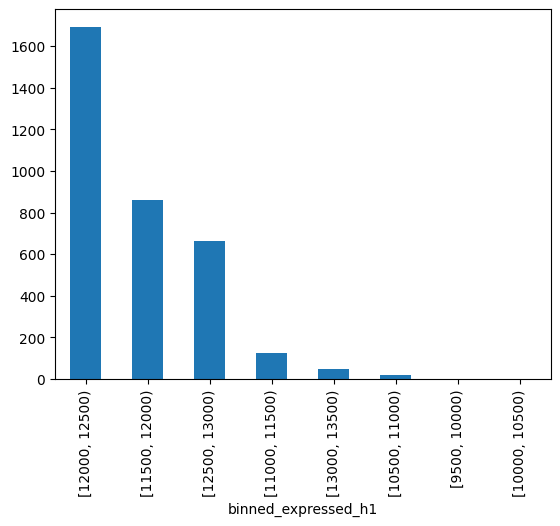

In [18]:
print(gene_pam50['binned_expressed_h1'].value_counts().plot(kind='bar'))

#### Second criterion: `log2(TPM+1) > 2`

In [19]:
gene_pam50['expressed_genes_h2'] = gene_pam50.apply(lambda row: np.sum(row[col] > 2 for col in num_cols), axis=1)


C:\Users\ntama\AppData\Local\Temp\ipykernel_28880\1409687111.py:1: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  gene_pam50['expressed_genes_h2'] = gene_pam50.apply(lambda row: np.sum(row[col] > 2 for col in num_cols), axis=1)


binned_expressed_h2
[10000, 10500)    1582
[9500, 10000)     1098
[10500, 11000)     426
[9000, 9500)       244
[8500, 9000)        39
[11000, 11500)      10
[8000, 8500)         8
[7000, 7500)         1
[7500, 8000)         1
Name: count, dtype: int64
Axes(0.125,0.11;0.775x0.77)


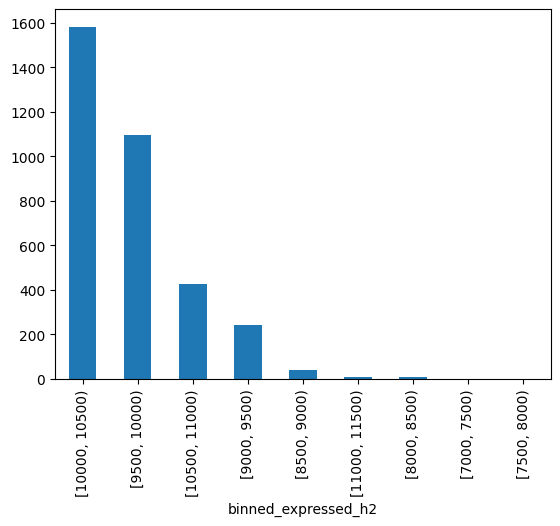

In [20]:
bins_2 = range(7000, 12000, 500)
gene_pam50['binned_expressed_h2'] = pd.cut(gene_pam50['expressed_genes_h2'], bins_2, right=False)
print(gene_pam50['binned_expressed_h2'].value_counts())
print(gene_pam50['binned_expressed_h2'].value_counts().plot(kind='bar'))

In [21]:
print(f"Median for expressed genes higher than 2: {gene_pam50['expressed_genes_h2'].median()}")

Median for expressed genes higher than 2: 10089.0


#### Third criterion: `log2(TPM+1) > 10`

In [22]:
gene_pam50['expressed_genes_h10'] = gene_pam50.apply(lambda row: np.sum(row[col] > 10 for col in num_cols), axis=1)

C:\Users\ntama\AppData\Local\Temp\ipykernel_28880\676576784.py:1: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  gene_pam50['expressed_genes_h10'] = gene_pam50.apply(lambda row: np.sum(row[col] > 10 for col in num_cols), axis=1)


binned_expressed_h10
[80, 100)     1590
[60, 80)       973
[100, 120)     676
[40, 60)       110
[120, 140)      56
[140, 160)       3
[20, 40)         1
[0, 20)          0
Name: count, dtype: int64
Axes(0.125,0.11;0.775x0.77)


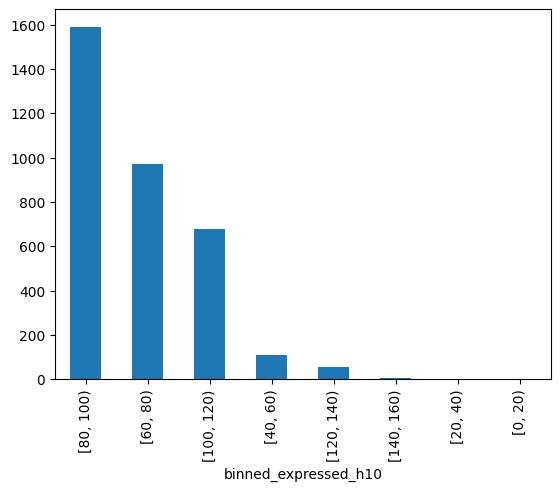

In [23]:
bins_10 = range(0, 180, 20)
gene_pam50['binned_expressed_h10'] = pd.cut(gene_pam50['expressed_genes_h10'], bins_10, right=False)
print(gene_pam50['binned_expressed_h10'].value_counts())
print(gene_pam50['binned_expressed_h10'].value_counts().plot(kind='bar'))

In [24]:
print(f"Median for expressed genes higher than 10: {gene_pam50['expressed_genes_h10'].median()}")

Median for expressed genes higher than 10: 87.0


In [25]:
gene_pam50['pam50 subtype'].value_counts()

pam50 subtype
LumA      1709
LumB       767
Basal      360
Her2       348
Normal     225
Name: count, dtype: int64

### Finding the percentage of samples where each gene is higher than 1
Proportion of samples per expressed gene

In [26]:
gene_expressed_props = ((gene_pam50[num_cols] > 1).sum(axis=0) / len(gene_pam50) * 100).round(2)

print(gene_expressed_props)

5_8S_rRNA      1.11
5S_rRNA       57.99
6M1-18         0.00
7M1-2          0.06
7SK           19.98
              ...  
ZYG11A         6.89
ZYG11B        99.94
ZYX          100.00
ZZEF1         99.15
ZZZ3          99.97
Length: 30865, dtype: float64


`Observations`:</br>
- Here we have a series where the left string is the gene and the value is the percentage of samples where this gene is highly expressed (higher than 1). This will be helpful to get rid of noisy features with low predictive power.</br>
- On the other hand, samples with less than 50% of expressed genes compared to the majority of samples, will be removed. `This criterion hasn't been met, so no samples will be removed`
- Before making any decisions, this will be compared with PCA.

### Removing genes with less than 20% expression among samples

In [27]:
cols_to_keep = gene_expressed_props[gene_expressed_props >= 20].index
gene_pam50_redux = gene_pam50[cols_to_keep]

print(f"New reduced dataset has {gene_pam50_redux.shape[1]} columns")

New reduced dataset has 13621 columns


In [28]:
#adding 'SampleID' and 'pam50 subtype'
gene_pam50_redux.insert(0, 'SampleID', gene_pam50['SampleID'])


In [29]:
gene_pam50_redux.insert(13622, 'pam50 subtype', gene_pam50['pam50 subtype'])

gene_pam50_redux.head(20)

,SampleID,5S_rRNA,A1BG,A2M,A4GALT,AAAS,AACS,AAED1,AAGAB,AAK1,...,ZW10,ZWILCH,ZWINT,ZXDB,ZXDC,ZYG11B,ZYX,ZZEF1,ZZZ3,pam50 subtype
0,F1,4.911099,0.598115,6.172477,2.338407,3.494541,3.316944,2.615362,3.295121,1.801903,...,2.918632,1.108204,3.044573,2.425306,3.244432,1.468899,6.281767,1.774107,2.437227,Basal
1,F2,-3.321928,2.363673,7.113514,2.806512,4.128479,3.704010,2.411364,3.967500,2.155626,...,2.551831,1.678388,2.743902,1.861781,2.727427,1.924761,7.169613,1.764214,2.876100,LumA
2,F3,-3.321928,2.647738,5.641996,2.046831,3.906716,3.948050,2.354602,4.036218,2.610794,...,3.319094,2.443392,4.719843,1.365396,3.122333,1.619277,6.683400,2.039246,2.929346,LumB
3,F4,3.656393,1.378576,7.236769,3.740478,4.124308,4.064205,2.296178,4.422369,2.324835,...,2.588427,2.441704,4.157466,2.038984,3.182823,1.969433,6.666306,2.771650,2.777674,LumA
4,F5,4.190104,2.759643,7.508171,3.309973,3.719936,3.625562,2.876102,4.065878,2.373666,...,2.243450,1.749230,1.024820,2.032704,3.588842,2.998474,6.479006,2.696269,3.957146,Normal
5,F6,2.556304,2.287331,9.701680,3.052191,3.629136,3.175245,3.804425,3.607288,2.607106,...,3.679092,2.092667,3.096097,0.985107,3.054852,2.318660,7.711859,2.905767,3.892004,Basal
6,F7,2.590351,1.404053,8.041422,2.783202,3.571327,6.198263,3.428960,3.632359,2.659293,...,2.486658,1.032046,1.470292,2.024802,3.039376,2.923033,6.692379,2.871403,3.851292,Normal
7,F8,5.691788,1.767546,8.244968,3.376382,3.651679,4.311988,3.203422,3.595694,2.124836,...,2.516205,1.774266,1.893492,1.481707,2.815260,2.923606,6.152952,2.966001,3.726758,Normal
8,F9,-3.321928,3.082967,6.697515,2.482203,3.337047,3.005123,3.181508,4.595156,2.786640,...,2.326941,1.900865,2.424017,1.353414,2.859130,2.485166,6.256384,1.711416,3.344201,Her2
9,F10,3.223401,2.391895,7.306434,2.974192,3.484695,2.761785,2.883269,3.955956,2.887812,...,1.762296,1.293789,2.752725,1.773916,2.756937,1.816193,6.772483,2.195755,2.201702,LumA


`Observations`:</br>
The new filtered dataset has been reduced from 30867 to 13623 features. Only features with gene expression higher than 1 have been kept

In [30]:
print(os.getcwd())

c:\Users\ntama\Documentos\Data Science\My Projects\breast-cancer-gene-test\notebooks


In [31]:
#exporting reduced dataset
gene_pam50_redux.to_csv("../processed/gene_pam50_redux.csv")